In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_CLEANED.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
# Encoding 
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
# Independent and dependent features
X= df.drop('FWI', axis=1)
y=df["FWI"]

In [26]:
# Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.24, random_state=42)

In [27]:
X_train.shape,X_test.shape

((184, 11), (59, 11))

In [13]:
# Feature selection based on coorelation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658838,-0.307894,-0.318994,0.696714,0.498973,0.390693,0.631354,0.474035,0.545368,0.260710
RH,-0.658838,1.000000,0.231659,0.243219,-0.654778,-0.417470,-0.238297,-0.718423,-0.364886,-0.461483,-0.401116
Ws,-0.307894,0.231659,1.000000,0.251717,-0.192245,-0.005482,0.091624,-0.028658,0.029927,-0.084063,-0.200575
Rain,-0.318994,0.243219,0.251717,1.000000,-0.546140,-0.289713,-0.301912,-0.346329,-0.300717,-0.370797,-0.062344
FFMC,0.696714,-0.654778,-0.192245,-0.546140,1.000000,0.620692,0.523423,0.751401,0.606760,0.782395,0.255048
DMC,0.498973,-0.417470,-0.005482,-0.289713,0.620692,1.000000,0.868931,0.686857,0.983224,0.615315,0.213479
DC,0.390693,-0.238297,0.091624,-0.301912,0.523423,0.868931,1.000000,0.514758,0.942519,0.540932,-0.059769
ISI,0.631354,-0.718423,-0.028658,-0.346329,0.751401,0.686857,0.514758,1.000000,0.644944,0.742394,0.299179
BUI,0.474035,-0.364886,0.029927,-0.300717,0.606760,0.983224,0.942519,0.644944,1.000000,0.609800,0.115827
Classes,0.545368,-0.461483,-0.084063,-0.370797,0.782395,0.615315,0.540932,0.742394,0.609800,1.000000,0.196818


<Axes: >

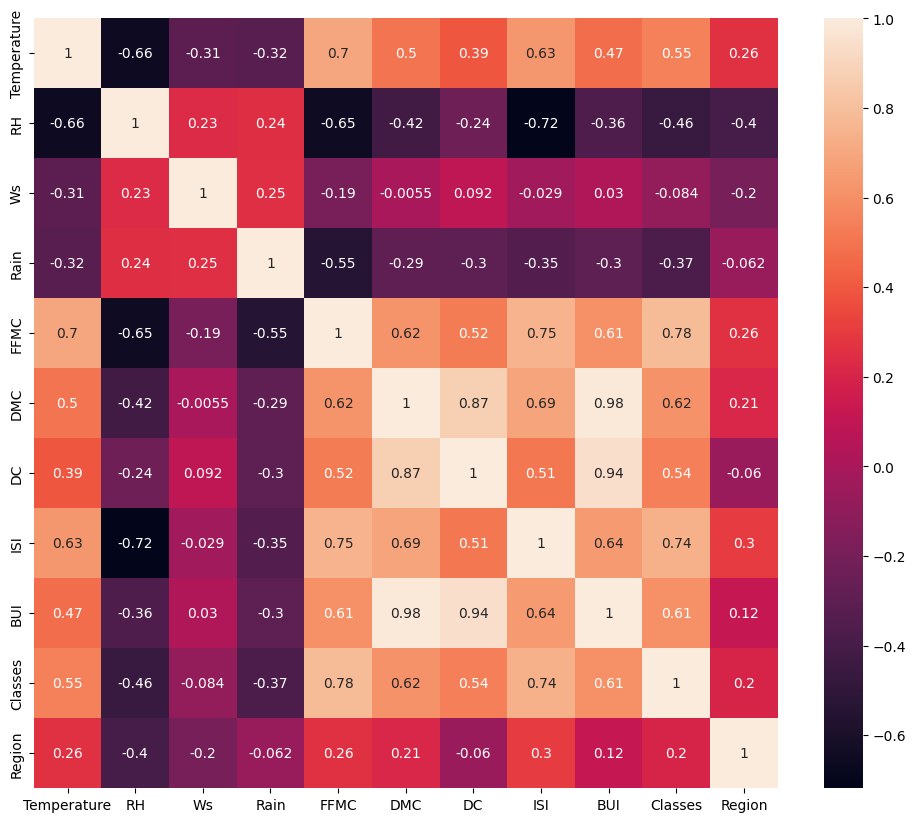

In [14]:
# Check for multicolienarity 

plt.figure(figsize=(12,10))
corelation= X_train.corr()
sns.heatmap(corelation,annot=True)

In [15]:
# Removing highly corelated feature 

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                

In [28]:
# Threshold - Donmain Experties
corr_features=correlation(X_train,0.85)

In [29]:
# Drop features when corr is more then threshold
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((184, 9), (59, 9))

##  Feature scalling or standardization

In [22]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
X_train_scaled

array([[ 1.04431174, -1.9319257 , -0.97806006, ...,  0.96542324,
         0.89661673,  1.        ],
       [ 0.50227123, -0.4040039 ,  0.54382621, ..., -0.03293366,
         0.89661673,  1.        ],
       [-0.85283004,  0.79176099,  1.30476935, ..., -0.63659133,
        -1.11530374, -1.        ],
       ...,
       [-1.93691106,  0.92462375,  0.54382621, ..., -1.07772577,
        -1.11530374, -1.        ],
       [ 0.50227123, -0.20470975,  0.16335464, ...,  0.5939416 ,
         0.89661673,  1.        ],
       [-0.58180979,  0.99105514,  2.06571248, ..., -0.86876735,
        -1.11530374, -1.        ]], shape=(184, 9))

# Box plot to understand the effect of standard scaler

Text(0.5, 1.0, 'X_train after scaling')

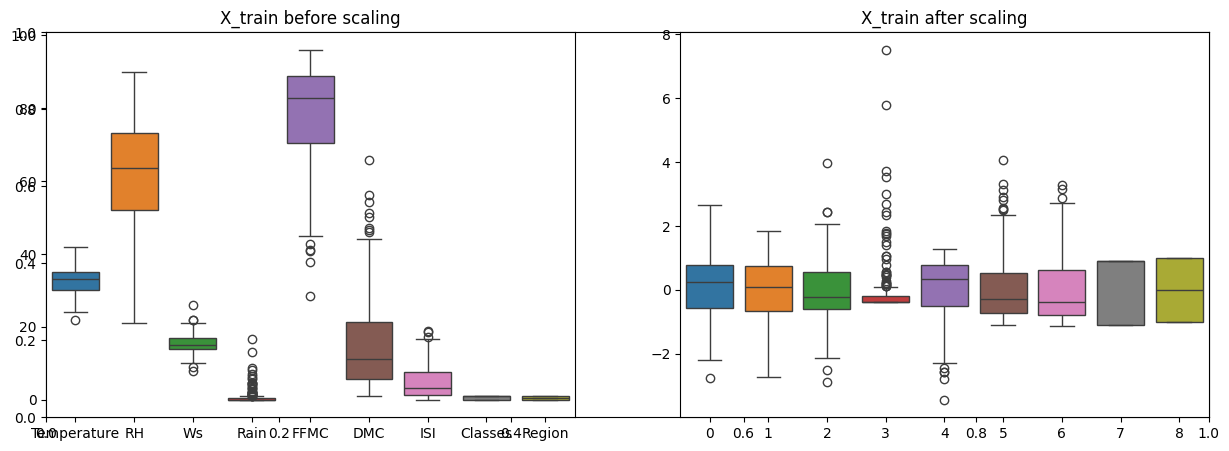

In [40]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

##  Linear regression model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg= LinearRegression()

In [48]:
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ",mae)
print("R2 Score ",score)

Mean Absolute Error  0.55374770916416
R2 Score  0.9844432599139653


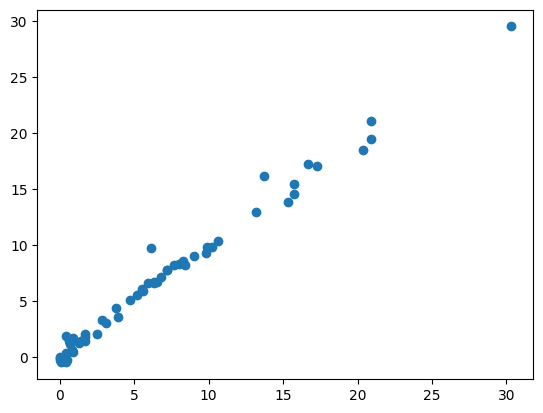

In [50]:
plt.scatter(y_test, y_pred)

#If it foolows a linear relationship the it is a good model

## Lasso regresion

In [51]:
from sklearn.linear_model import Lasso
lasso= Lasso()

In [52]:
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ",mae)
print("R2 Score ",score)

Mean Absolute Error  1.1322512817776802
R2 Score  0.9490025996934993


## Ridge regression

In [53]:
from sklearn.linear_model import Ridge
ridge= Ridge()

In [54]:
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ",mae)
print("R2 Score ",score)

Mean Absolute Error  0.5717877170034102
R2 Score  0.9839537312216181


## Elastic net

In [55]:
from sklearn.linear_model import ElasticNet
elastic= ElasticNet()


In [56]:
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ",mae)
print("R2 Score ",score)

Mean Absolute Error  1.8783258343143936
R2 Score  0.8746572360207088


## Cross validation

In [57]:
from sklearn.linear_model import LassoCV
LCV=LassoCV(cv=5)
LCV.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [58]:
LCV.predict(X_test_scaled)

array([ 8.17709736,  7.68518468, -0.25144824,  4.73668465,  6.7981315 ,
        1.78449055,  2.24039683,  7.65195257,  1.99071828,  3.39949141,
        0.62658643,  9.97173112,  9.37352539, 16.9992579 , 18.290138  ,
        1.62507334,  1.63329605, -0.65086819,  7.28705473,  3.11891075,
        1.95529375,  0.17630055,  6.47717629,  0.13872793, 21.01042726,
        5.12792349,  5.86349801,  9.76195936, -0.7808786 ,  9.92992076,
        6.72420423, -0.31190215, 10.3138108 , 14.44096273,  1.71003238,
        0.84270524,  2.0336879 ,  5.98557533, -0.6242088 , -0.56020113,
        6.4738619 ,  2.08010046,  8.47005563, -0.85557908, 15.4179873 ,
        8.33169363,  8.499242  ,  1.43774656, 13.04041916,  1.20667713,
       29.10450236,  5.50789346, 17.17244293, 19.29482544, 13.71444137,
       16.05905392,  0.99852981,  9.0989276 ,  3.85435711])

In [59]:
LCV.alpha_

np.float64(0.05715028375681858)

In [62]:
LCV.alphas_

array([7.0457541 , 6.57089385, 6.1280376 , 5.71502838, 5.32985459,
       4.97064023, 4.63563571, 4.32320938, 4.03183954, 3.76010705,
       3.50668842, 3.27034935, 3.04993875, 2.84438309, 2.65268119,
       2.47389936, 2.30716682, 2.1516715 , 2.00665604, 1.87141414,
       1.74528709, 1.62766058, 1.5179617 , 1.41565617, 1.32024568,
       1.23126554, 1.14828236, 1.07089197, 0.99871744, 0.93140723,
       0.8686335 , 0.81009051, 0.75549312, 0.70457541, 0.65708939,
       0.61280376, 0.57150284, 0.53298546, 0.49706402, 0.46356357,
       0.43232094, 0.40318395, 0.3760107 , 0.35066884, 0.32703494,
       0.30499388, 0.28443831, 0.26526812, 0.24738994, 0.23071668,
       0.21516715, 0.2006656 , 0.18714141, 0.17452871, 0.16276606,
       0.15179617, 0.14156562, 0.13202457, 0.12312655, 0.11482824,
       0.1070892 , 0.09987174, 0.09314072, 0.08686335, 0.08100905,
       0.07554931, 0.07045754, 0.06570894, 0.06128038, 0.05715028,
       0.05329855, 0.0497064 , 0.04635636, 0.04323209, 0.04031

In [63]:
LCV.mse_path_

array([[48.75958517, 68.13322007, 55.7203003 , 75.78014503, 39.59222378],
       [43.29784851, 64.41832726, 50.49769411, 73.0288831 , 35.4914806 ],
       [37.99128409, 57.61867254, 43.49918929, 65.96565398, 31.91313096],
       [33.36248274, 50.83103044, 37.50304579, 59.7529435 , 28.78992328],
       [29.32390957, 44.89416015, 32.3726265 , 54.28465308, 25.03248964],
       [25.79978025, 39.69934769, 27.98936584, 49.31565426, 21.6537517 ],
       [22.72375348, 35.15186329, 24.25075295, 43.43601901, 18.73227317],
       [20.03819931, 31.16971676, 21.06779764, 38.30461373, 16.20815233],
       [17.69294459, 27.68092083, 18.3634948 , 33.82614574, 14.02812545],
       [15.64416655, 24.62292303, 16.07103624, 29.91611055, 12.14634083],
       [13.85412235, 21.94120347, 14.13302603, 26.50147258, 10.52298891],
       [12.28953027, 19.58805098, 12.49941341, 23.5186419 ,  9.12351028],
       [10.921544  , 17.52242645, 11.1270476 , 20.91173363,  7.9176098 ],
       [ 9.72503962, 15.70798316,  9.9

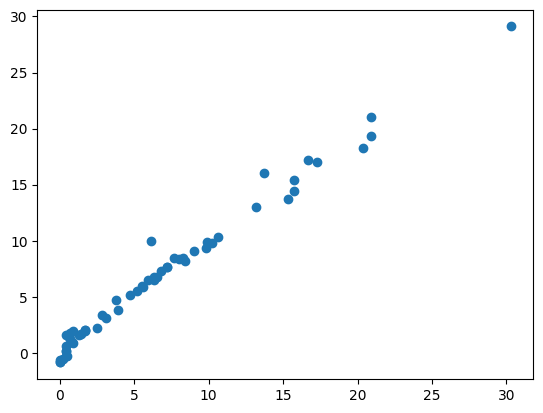

In [64]:
y_pred= LCV.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.linear_model import RidgeCV
rcv=RidgeCV(cv=5)



In [66]:
rcv.fit(X_train_scaled,y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


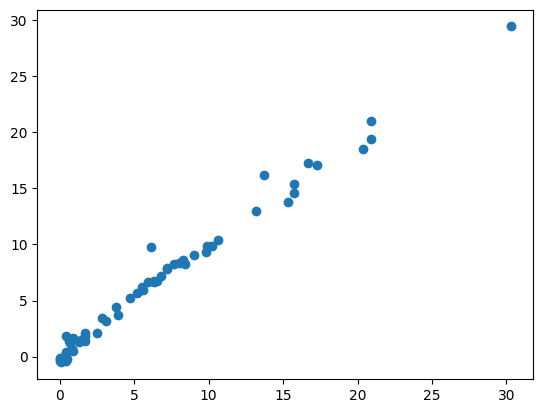

In [67]:
y_pred=rcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

In [68]:
from sklearn.linear_model import ElasticNetCV
enc=ElasticNetCV()

In [72]:
enc.fit(X_train_scaled,y_train)
y_pred=enc.predict(X_test_scaled)

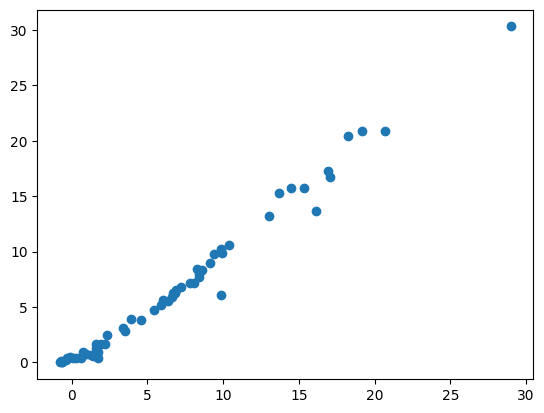

In [73]:
plt.scatter(y_pred,y_test)

In [74]:
import pickle
pickle.dump(linreg,open("regression.pkl","wb"))

In [76]:
model=pickle.load(open("regression.pkl","rb"))

In [77]:
model.predict(X_test_scaled)

array([ 8.22629306e+00,  7.76190802e+00, -2.43676369e-01,  4.36438816e+00,
        6.69928723e+00,  1.36806744e+00,  2.03698194e+00,  7.82474560e+00,
        1.71824770e+00,  3.34005344e+00,  4.03065635e-01,  9.76471366e+00,
        9.34652582e+00,  1.70639438e+01,  1.85174098e+01,  1.25143372e+00,
        1.89128206e+00, -2.25646912e-02,  7.18197632e+00,  3.08044583e+00,
        1.41793241e+00,  2.24124347e-01,  6.58750740e+00,  3.32757637e-01,
        2.10940788e+01,  5.14130389e+00,  5.93845035e+00,  9.81289503e+00,
       -6.30781697e-02,  9.81489710e+00,  6.63184232e+00, -4.41066245e-01,
        1.04015067e+01,  1.45850098e+01,  1.48152693e+00,  4.38323414e-01,
        2.03873716e+00,  6.11097316e+00, -4.68915533e-01, -3.18221499e-01,
        6.70075165e+00,  1.80488363e+00,  8.60704340e+00, -2.70655326e-01,
        1.54601498e+01,  8.32457326e+00,  8.25058731e+00,  1.42226639e+00,
        1.29804681e+01,  1.21931925e+00,  2.95447545e+01,  5.57714376e+00,
        1.72929166e+01,  